<a href="https://colab.research.google.com/github/ludmillaconti/teste_previsao/blob/main/C%C3%B3pia_de_projeto_previsao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informaçãoes meteorológicas e de compostos químicos 
- Passo 1: importar a base de dados
- Passo 2: tratamento da base de dados
  - excluir/corrigir linhas e colunas vazias
  - ajeitar colunas importadas
  - excluir colunas inuteis (informações desnecessárias)
- Passo 3: analisar base de dados
  - relação entre as variáveis


Passo 1: importar a base de dados

In [ ]:
import os
from datetime import datetime, date, time, timezone, timedelta

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


tabela_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teste Forecasting TensorFlow/2017-4.csv')#, parse_dates=["date"])

#tabela_dados[['date','time']] = tabela_dados['datetime'].str.split(expand=True)
tabela_dados['data'] = (pd.to_datetime(tabela_dados.pop('Unnamed: 1'), format='%d/%m/%Y') + 
                  pd.to_timedelta(tabela_dados.pop('Unnamed: 2')))

data = tabela_dados.pop('data')

#date_time = pd.to_datetime(tabela_dados.pop('data'), format='%d.%m.%Y %H:%M:%S')

#date_time = datetime.strptime(tabela_dados.pop('date'), '%d.%m.%Y %H:%M:%S', errors='coerce')

#date_time = tabela_dados['data']

#tabela_dados = tabela_dados.drop('Unnamed: 1', axis=1)
#tabela_dados = tabela_dados.drop('Unnamed: 2', axis=1)
tabela_dados = tabela_dados.drop('datetime', axis=1)

#date_time = pd.to_datetime(tabela_dados['datetime'])
#date_time = datetime.strptime(tabela_dados.pop('datetime'), '%d.%m.%Y %H:%M:%S', errors='coerce')

#tabela_dados['data'] = [datetime.strftime(datetime.now() - timedelta(hours = _),"%d/%m/%Y, %H:%M:%S") for _ in range(8760) ]


print(tabela_dados)
tabela_dados.head


Passo 2: tratamento da base de dados

In [ ]:
display(tabela_dados.info())

tabela_dados = tabela_dados.fillna(tabela_dados.mean())
display(tabela_dados.describe())

Passo 3: analisar dados

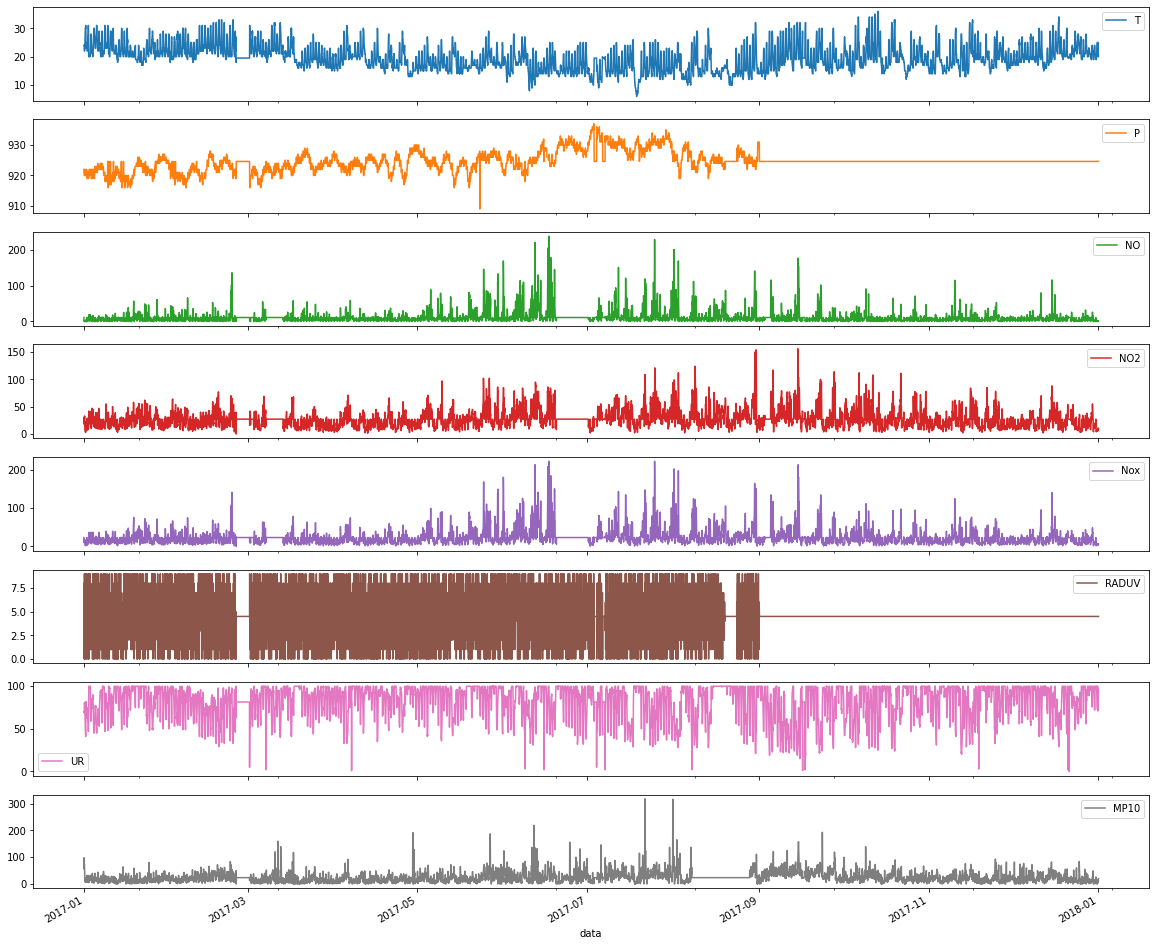

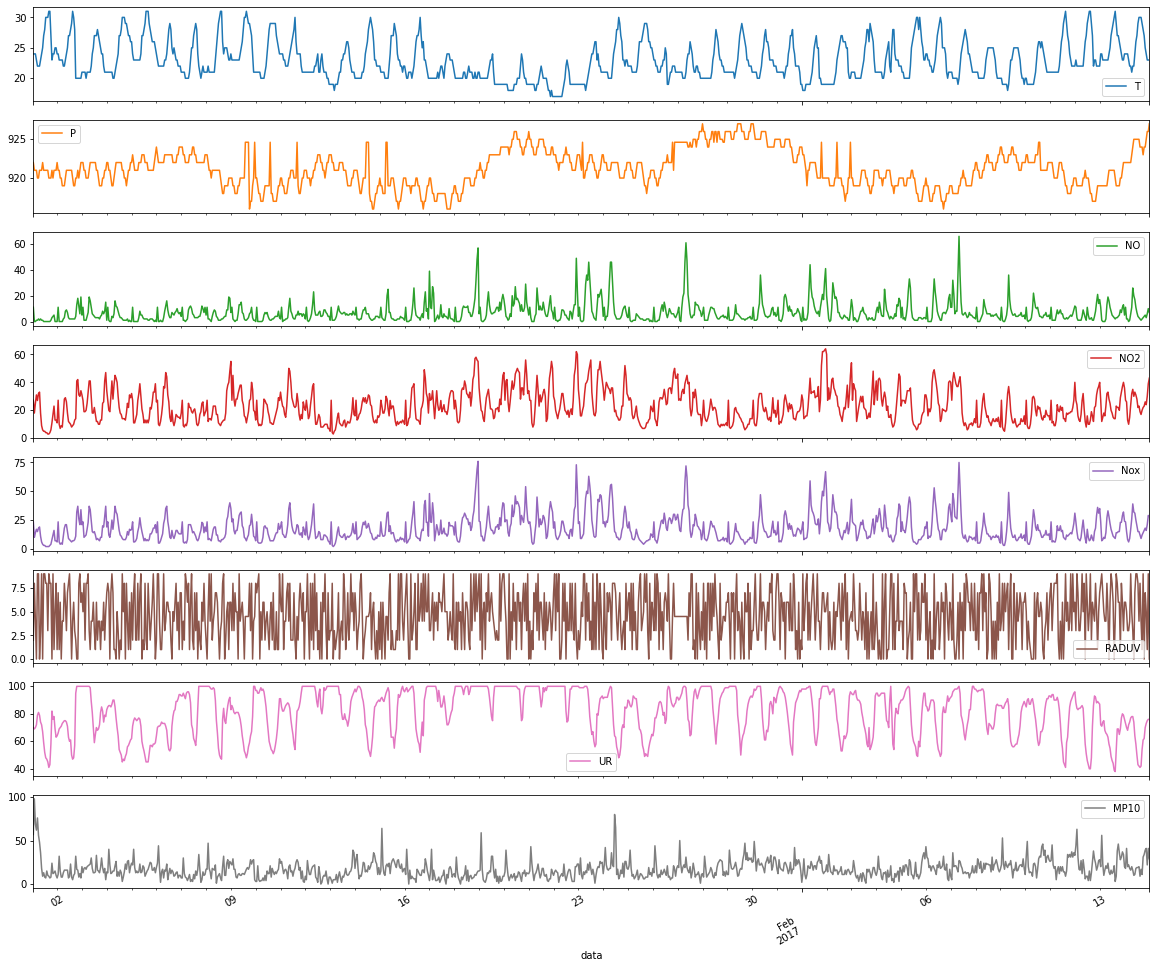

In [ ]:


plot_cols = ['T','P','NO', 'NO2', 'Nox', 'RADUV', 'UR', 'MP10']
plot_features = tabela_dados[plot_cols]
plot_features.index = data
_ = plot_features.plot(subplots=True, figsize=(20, 18))

plot_features = tabela_dados[plot_cols][:1080]
plot_features.index = data[:1080]
_ = plot_features.plot(subplots=True, figsize=(20, 18))

In [ ]:
tabela_dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DV,8761.0,178.072213,133.014231,0.0,128.0,153.000000,188.000000,888.0
MP10,8761.0,23.727160,18.580561,0.0,12.0,21.000000,30.000000,318.0
NO,8761.0,11.078263,17.786798,0.0,3.0,6.000000,11.078263,238.0
NO2,8761.0,27.194228,16.924557,0.0,15.0,25.000000,33.000000,156.0
Nox,8761.0,23.444098,21.282668,0.0,11.0,19.000000,25.000000,223.0
O3,8761.0,40.661948,30.333857,0.0,20.0,37.000000,52.000000,214.0
P,8761.0,924.619091,3.003632,909.0,923.0,924.619091,925.000000,937.0
RADUV,8761.0,4.494364,2.258996,0.0,3.0,4.494364,5.000000,9.0
SO2,8761.0,2.747874,1.433415,0.0,2.0,2.747874,2.747874,16.0
T,8761.0,19.525515,4.392091,6.0,16.0,19.000000,22.000000,36.0


Velocidade do vento

In [ ]:
dv = tabela_dados['DV']
bad_dv = dv == 777
dv[bad_dv] = 0.0
bad1_dv = dv == 888
dv[bad1_dv] = 0.0


tabela_dados['DV'].min()


0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

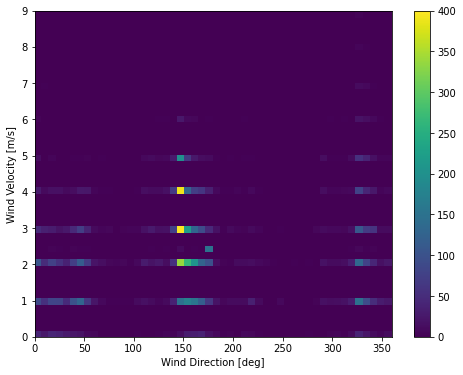

In [ ]:
plt.hist2d(tabela_dados['DV'], tabela_dados['VV'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [ ]:
tabela_dados.head()

,DV,MP10,NO,NO2,Nox,O3,P,RADUV,SO2,T,UR,VV
0,36.0,57.0,11.078263,27.194228,23.444098,40.0,922.0,2.0,3.000000,24.0,70.0,2.422524
1,19.0,98.0,0.000000,18.000000,10.000000,43.0,921.0,8.0,4.000000,24.0,69.0,2.422524
2,18.0,69.0,0.000000,25.000000,14.000000,31.0,921.0,4.0,3.000000,24.0,70.0,2.422524
3,27.0,62.0,1.000000,31.000000,17.000000,19.0,921.0,0.0,2.747874,23.0,72.0,2.422524
4,40.0,76.0,1.000000,27.000000,15.000000,18.0,920.0,9.0,3.000000,22.0,79.0,2.422524


Transformando a velocidade do vento e a direção do vento em um vetor.

In [ ]:
vv = tabela_dados.pop('VV')


# Convert to radians.
wd_rad = tabela_dados.pop('DV')*np.pi / 180

# Calculate the wind x and y components.
tabela_dados['Wx'] = vv*np.cos(wd_rad)
tabela_dados['Wy'] = vv*np.sin(wd_rad)



(-6.998933866094739, 8.96575228282571, -6.709364543563394, 5.297685557153563)

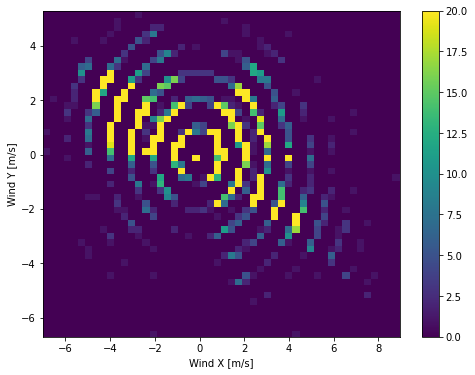

In [ ]:
plt.hist2d(tabela_dados['Wx'], tabela_dados['Wy'], bins=(50, 50), vmax=20, )
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [ ]:
#timestamp = datetime.timestamp(data)

In [ ]:
#day = 24*60*60
#year = (365.2425)*day

#df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
#df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
#df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
#df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Achar frequências de interesse

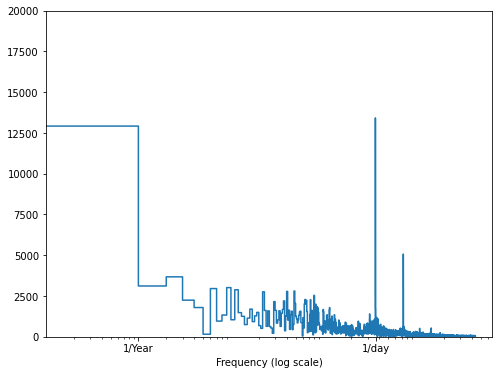

In [ ]:


fft = tf.signal.rfft(tabela_dados['T'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(tabela_dados['T'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 20000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Dividindo o conjunto de dados (70, 20 e 10)

In [ ]:
tabela = tabela_dados

display(tabela)
column_indices = {name: i for i, name in enumerate(tabela.columns)}

n = len(tabela)
train_df = tabela[0:int(n*0.7)]
val_df = tabela[int(n*0.7):int(n*0.9)]
test_df = tabela[int(n*0.9):]

num_features = tabela.shape[1]

train_df

,MP10,NO,NO2,Nox,O3,P,RADUV,SO2,T,UR,Wx,Wy
0,57.00000,11.078263,27.194228,23.444098,40.000000,922.000000,2.000000,3.000000,24.000000,70.000000,1.959863,1.423924
1,98.00000,0.000000,18.000000,10.000000,43.000000,921.000000,8.000000,4.000000,24.000000,69.000000,2.290541,0.788697
2,69.00000,0.000000,25.000000,14.000000,31.000000,921.000000,4.000000,3.000000,24.000000,70.000000,2.303957,0.748601
3,62.00000,1.000000,31.000000,17.000000,19.000000,921.000000,0.000000,2.747874,23.000000,72.000000,2.158484,1.099803
4,76.00000,1.000000,27.000000,15.000000,18.000000,920.000000,9.000000,3.000000,22.000000,79.000000,1.855761,1.557168
...,...,...,...,...,...,...,...,...,...,...,...,...
8756,7.00000,0.000000,7.000000,4.000000,38.000000,924.619091,4.494364,2.747874,22.000000,86.000000,3.564026,-1.815962
8757,17.00000,0.000000,8.000000,5.000000,37.000000,924.619091,4.494364,2.747874,21.000000,89.000000,4.330127,-2.500000
8758,11.00000,0.000000,10.000000,6.000000,34.000000,924.619091,4.494364,2.747874,21.000000,93.000000,2.598076,-1.500000
8759,20.00000,0.000000,10.000000,6.000000,29.000000,924.619091,4.494364,2.747874,20.000000,96.000000,2.598076,-1.500000


,MP10,NO,NO2,Nox,O3,P,RADUV,SO2,T,UR,Wx,Wy
0,57.0,11.078263,27.194228,23.444098,40.0,922.000000,2.000000,3.000000,24.0,70.0,1.959863,1.423924
1,98.0,0.000000,18.000000,10.000000,43.0,921.000000,8.000000,4.000000,24.0,69.0,2.290541,0.788697
2,69.0,0.000000,25.000000,14.000000,31.0,921.000000,4.000000,3.000000,24.0,70.0,2.303957,0.748601
3,62.0,1.000000,31.000000,17.000000,19.0,921.000000,0.000000,2.747874,23.0,72.0,2.158484,1.099803
4,76.0,1.000000,27.000000,15.000000,18.0,920.000000,9.000000,3.000000,22.0,79.0,1.855761,1.557168
...,...,...,...,...,...,...,...,...,...,...,...,...
6127,47.0,11.078263,27.194228,23.444098,14.0,924.619091,4.494364,2.747874,18.0,94.0,1.812616,0.845237
6128,45.0,11.078263,27.194228,23.444098,39.0,924.619091,4.494364,2.747874,20.0,70.0,1.841010,0.781462
6129,37.0,20.000000,74.000000,56.000000,52.0,924.619091,4.494364,2.747874,24.0,52.0,1.879385,0.684040
6130,31.0,19.000000,67.000000,51.000000,65.0,924.619091,4.494364,2.747874,26.0,40.0,0.970296,0.241922


Normalizando os dados

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

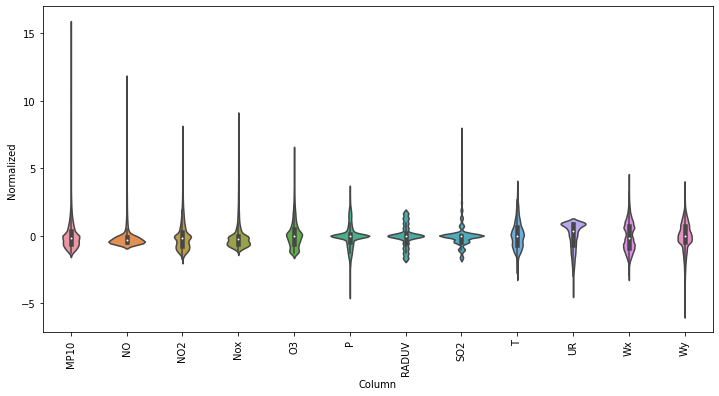

In [ ]:
df_std = (tabela - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(tabela_dados.keys(), rotation=90)

Previsões a partir de amostras consecutivas.

1. Com uma única saída
2. Com multiplas saídas

a. Previsão com um único time-step   
b. Previsões com multi-time-step


#Implementação da janela de dados


Para fazer uma única previsão 24 horas no futuro, dadas 24 horas de histórico

Para modelo que faz uma previsão de 1h no futuro, dadas 6h de histórico, precisaria de uma janela como esta

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

As duas janelas 

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['NO'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['NO']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['NO'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['NO']

Dividindo os dados

w2 é:

-input width = 6  
  inputs = 0 a 5               
-label width = 1                  
  label = 1

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

# Slicing doesn't preserve static shape information, so set the shapes manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

tabela.shape[1]


12

In [ ]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 12)
Inputs shape: (3, 6, 12)
labels shape: (3, 1, 1)


Modelo para uma única saída


#Plot


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='T', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

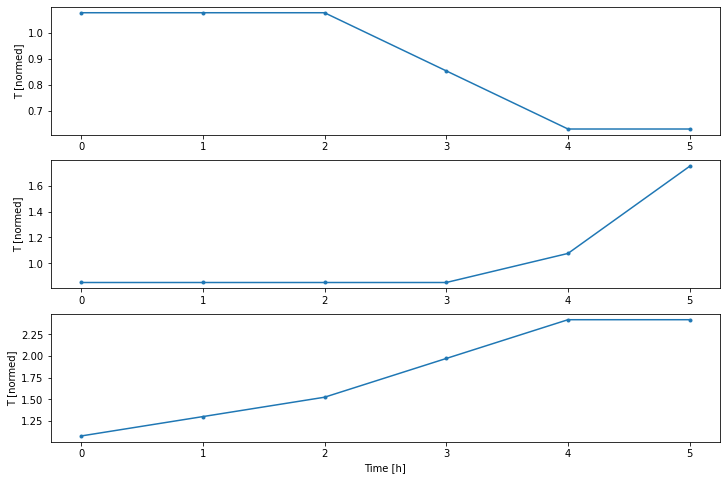

In [ ]:
w2.plot()

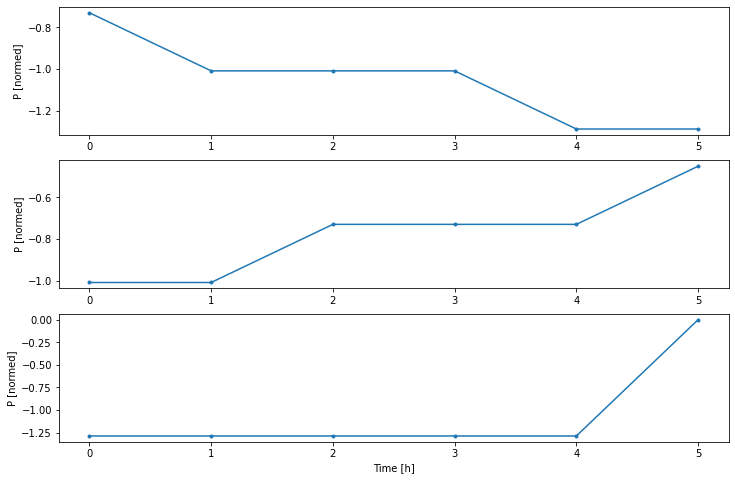

In [ ]:
w2.plot(plot_col='P')

Dataframe para tf.data.Dataset

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 6, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 12)
Labels shape (batch, time, features): (32, 1, 1)


#Para um único passo de tempo

1h no futuro com 6h de dados


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T'])
single_step_window

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Linha de base

Antes de construir um modelo treinável, seria bom ter uma linha de base de desempenho como um ponto de comparação com os modelos posteriores mais complicados.

A primeira tarefa é prever a temperatura em 1h no futuro, considerando o valor atual de todos os recursos. Os valores atuais incluem a temperatura atual.

Portanto, comece com um modelo que apenas retorne a temperatura atual como a previsão, prevendo "Sem alteração". Esta é uma linha de base razoável, pois a temperatura muda lentamente. É claro que essa linha de base funcionará menos bem se você fizer uma previsão futura.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = Baseline(label_index=column_indices['NO'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['NO'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


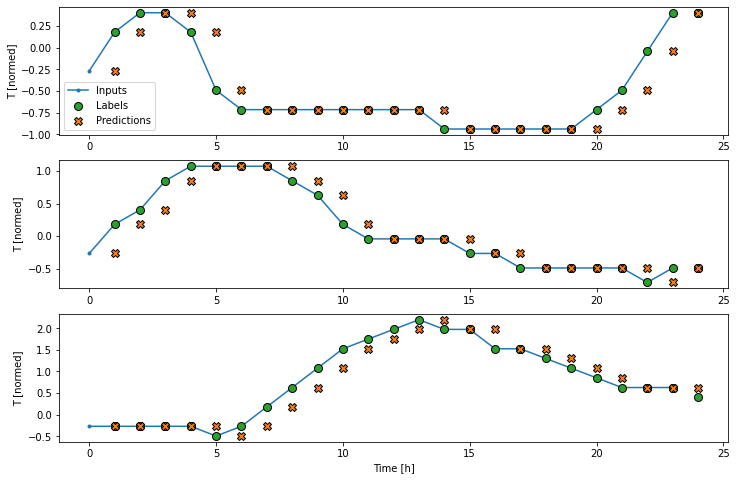

In [ ]:
wide_window.plot(baseline)

A linha azul mostra a temperatura de entrada em cada etapa de tempo. 

Os pontos verdes mostram o valor de previsão de destino. Esses pontos são mostrados no momento da previsão, não no momento da entrada. É por isso que o intervalo de rótulos é deslocado 1 etapa em relação às entradas.

As cruzes laranja são as previsões do modelo para cada intervalo de tempo de saída. Se o modelo previsse perfeitamente, as previsões pousariam diretamente nos pontos verdes

#Modelo linear



In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 12)
Output shape: (32, 1, 1)


In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
192/192 [==============================] - 2s 8ms/step - loss: 2.0273 - mean_absolute_error: 1.1360 - val_loss: 1.0702 - val_mean_absolute_error: 0.8059
Epoch 2/20
192/192 [==============================] - 1s 7ms/step - loss: 0.8930 - mean_absolute_error: 0.7555 - val_loss: 0.4918 - val_mean_absolute_error: 0.5504
Epoch 3/20
192/192 [==============================] - 1s 7ms/step - loss: 0.4492 - mean_absolute_error: 0.5339 - val_loss: 0.2767 - val_mean_absolute_error: 0.4130
Epoch 4/20
192/192 [==============================] - 2s 8ms/step - loss: 0.2765 - mean_absolute_error: 0.4167 - val_loss: 0.1953 - val_mean_absolute_error: 0.3482
Epoch 5/20
192/192 [==============================] - 1s 7ms/step - loss: 0.2017 - mean_absolute_error: 0.3542 - val_loss: 0.1605 - val_mean_absolute_error: 0.3148
Epoch 6/20
192/192 [==============================] - 1s 7ms/step - loss: 0.1625 - mean_absolute_error: 0.3157 - val_loss: 0.1385 - val_mean_absolute_error: 0.2906
Epoch 7/20
192/1

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


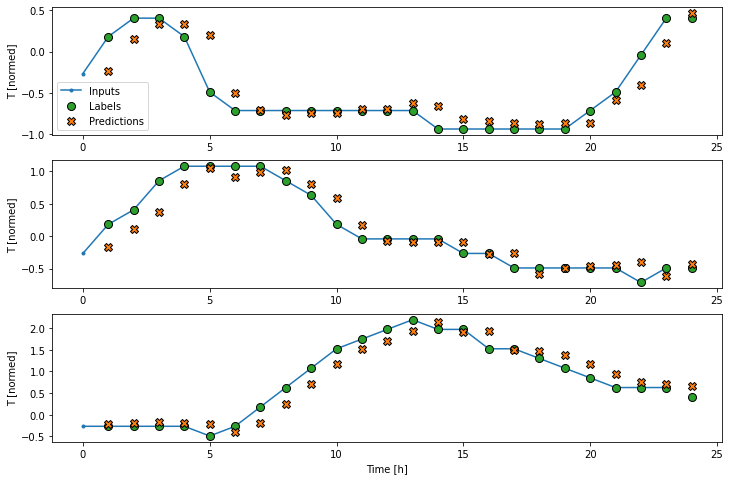

In [ ]:
wide_window.plot(linear)

Peso das camadas com relação a T (que é o input)


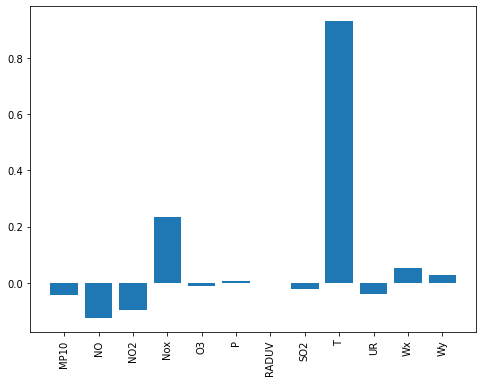

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Desempenho de modelos de etapa de entrada única mais profundos - mais realistas

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
192/192 [==============================] - 2s 8ms/step - loss: 0.3308 - mean_absolute_error: 0.4199 - val_loss: 0.0886 - val_mean_absolute_error: 0.2139
Epoch 2/20
192/192 [==============================] - 2s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.1762 - val_loss: 0.0799 - val_mean_absolute_error: 0.2015
Epoch 3/20
192/192 [==============================] - 1s 8ms/step - loss: 0.0515 - mean_absolute_error: 0.1650 - val_loss: 0.0781 - val_mean_absolute_error: 0.2000
Epoch 4/20
192/192 [==============================] - 1s 8ms/step - loss: 0.0498 - mean_absolute_error: 0.1618 - val_loss: 0.0746 - val_mean_absolute_error: 0.1911
Epoch 5/20
192/192 [==============================] - 1s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.1606 - val_loss: 0.0757 - val_mean_absolute_error: 0.1934
Epoch 6/20
55/55 [==============================] - 0s 5ms/step - loss: 0.0808 - mean_absolute_error: 0.2041


#Modelos multi-step

Produzindo lotes a cada 3h com labels de 1h


In [ ]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T']

Text(0.5, 1.0, 'Given 3h as input, predict 1h into the future.')

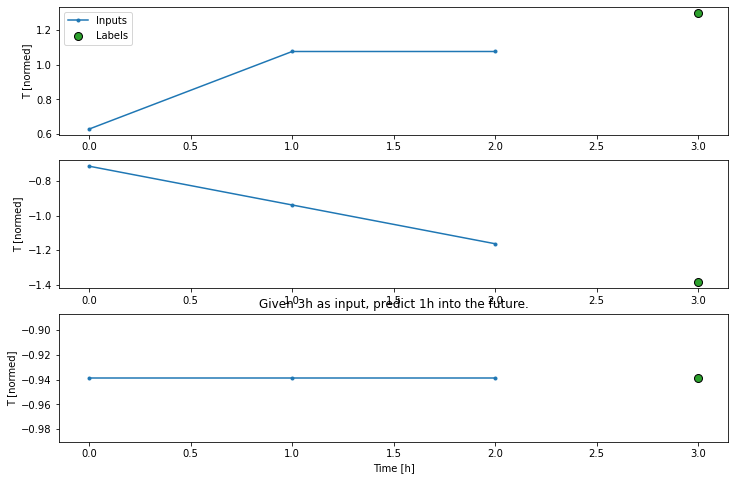

In [ ]:
conv_window.plot()
plt.title("Given 3h as input, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 12)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

55/55 [==============================] - 0s 5ms/step - loss: 0.0657 - mean_absolute_error: 0.1717


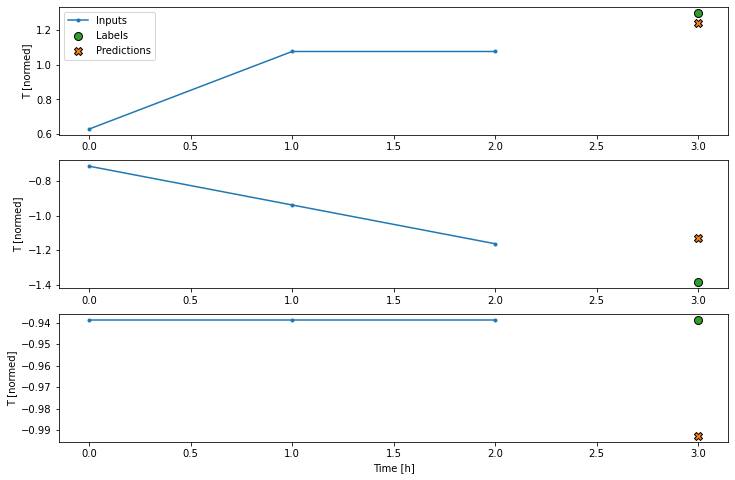

In [ ]:
conv_window.plot(multi_step_dense)

In [ ]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 12)

ValueError:Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 36 but received input with shape (32, 288)


#Modelos convolucionais

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 12)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

55/55 [==============================] - 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.1734


In [ ]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 12)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [ ]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['T']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 12)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


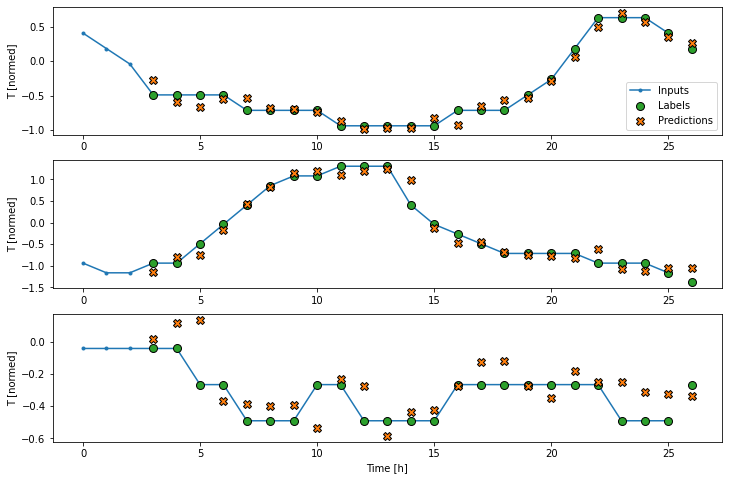

In [ ]:
wide_conv_window.plot(conv_model)

#Redes Neurais Recorrentes

Camada RNN usada - Long short term memory

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

54/54 [==============================] - 0s 7ms/step - loss: 0.0534 - mean_absolute_error: 0.1584


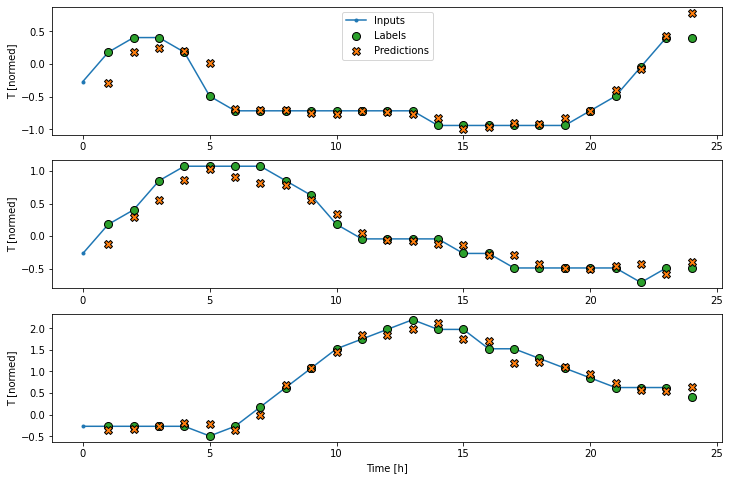

In [ ]:
wide_window.plot(lstm_model)

#Performance

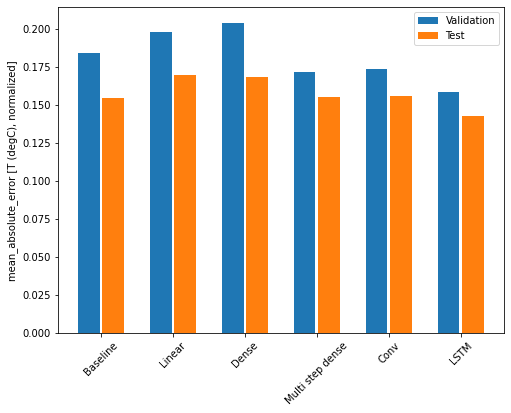

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.1545
Linear      : 0.1695
Dense       : 0.1685
Multi step dense: 0.1550
Conv        : 0.1562
LSTM        : 0.1429


##Modelos com multiplas saídas

In [ ]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 12)
Labels shape (batch, time, features): (32, 24, 12)


Baseline

In [ ]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

54/54 [==============================] - 0s 4ms/step - loss: 0.2463 - mean_absolute_error: 0.2452


Dense


In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [ ]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

55/55 [==============================] - 0s 4ms/step - loss: 0.2334 - mean_absolute_error: 0.2857


RNN

In [ ]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

54/54 [==============================] - 0s 7ms/step - loss: 0.2063 - mean_absolute_error: 0.2655

CPU times: user 47.9 s, sys: 6.23 s, total: 54.1 s
Wall time: 36.7 s


Conecções residuais

In [ ]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each timestep is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [ ]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

54/54 [==============================] - 1s 9ms/step - loss: 0.2156 - mean_absolute_error: 0.2681

CPU times: user 36 s, sys: 4.48 s, total: 40.4 s
Wall time: 28.7 s


#Performance

In [ ]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

#Modelos multi-step


Previsões de disparo único em que toda a série temporal é prevista de uma vez.

Predições autorregressivas em que o modelo só faz predições de etapa única e sua saída é realimentada como entrada.

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

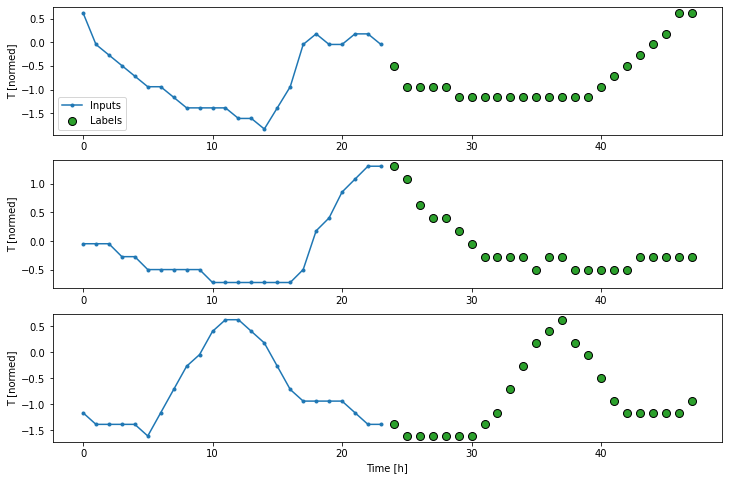

In [ ]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

#Baseline

54/54 [==============================] - 1s 7ms/step - loss: 1.2059 - mean_absolute_error: 0.6517


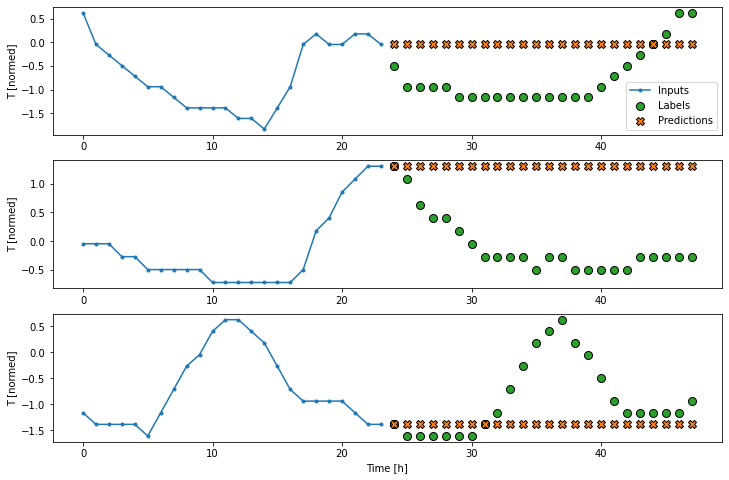

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

54/54 [==============================] - 0s 5ms/step - loss: 1.1055 - mean_absolute_error: 0.6090


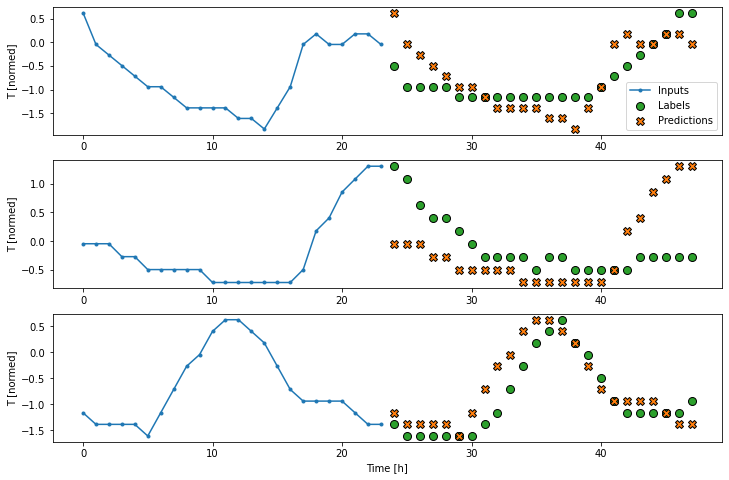

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

#Modelos com uma única saída


#Linear


54/54 [==============================] - 0s 5ms/step - loss: 0.7044 - mean_absolute_error: 0.5507


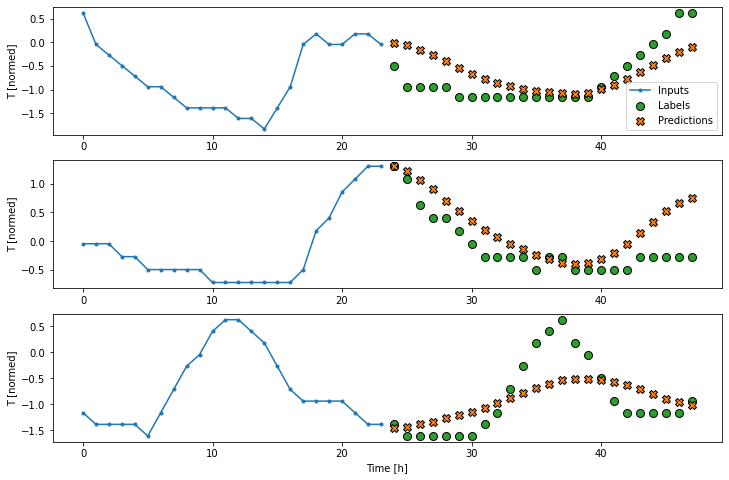

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

#Denso 


54/54 [==============================] - 0s 7ms/step - loss: 0.6737 - mean_absolute_error: 0.5470


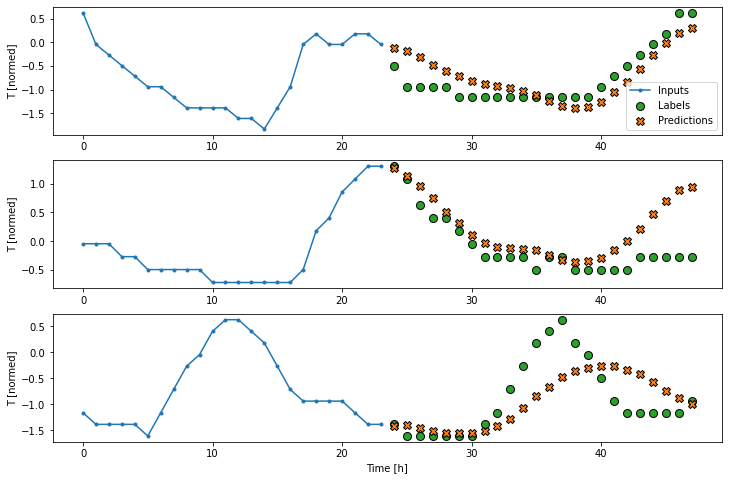

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

#CNN


54/54 [==============================] - 0s 5ms/step - loss: 0.6223 - mean_absolute_error: 0.5288


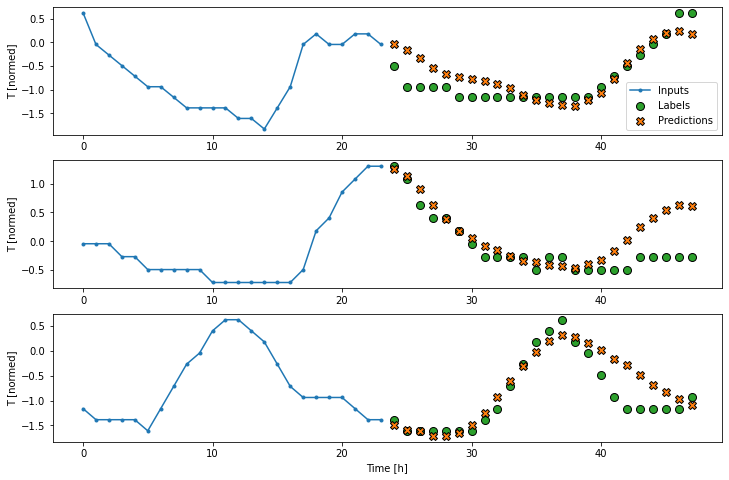

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#RNN

54/54 [==============================] - 0s 8ms/step - loss: 0.6248 - mean_absolute_error: 0.5375


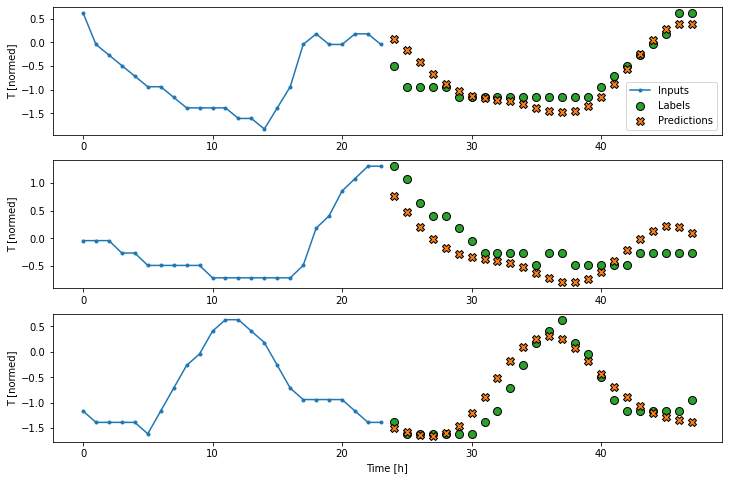

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

#Modelos autoregressivos


Modelos acima tem as saídas em um único time-step

Dividindo os time-steps

#RNN

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 12])

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the lstm state
  prediction, state = self.warmup(inputs)

  # Insert the first prediction
  predictions.append(prediction)

  # Run the rest of the prediction steps
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 12)


In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

#Performance

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [ ]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')